### Importy

In [66]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
import matplotlib.pyplot as plt

### Wczytanie pliku z danymi wejściowymi

In [255]:
df = pd.read_csv("exoplanets.csv")

In [256]:
df.head()

loc_rowid  pl_pnum   pl_orbper  pl_orbsmax  pl_orbeccen  pl_orbincl  pl_dens  st_dist  gaia_dist  st_optmag  gaia_gmag  st_teff  st_mass  st_rad  pl_rvamp  pl_eqt  pl_bmasse  pl_rade  pl_trandep  pl_trandur  pl_mnum  st_radv  st_logg  st_lum  st_dens  st_metfe  st_age  st_vsini
0          1        1   326.03000        1.29        0.231         NaN      NaN    93.37      93.37      4.740      4.372   4742.0     2.70   19.00     302.8     NaN  6165.6000      NaN         NaN         NaN        0    43.37     2.31   2.243      NaN     -0.35     NaN      1.20
1          2        1   516.21997        1.53        0.080         NaN      NaN   125.72     125.72      5.016      4.500   4213.0     2.78   29.79     189.7     NaN  4684.8142      NaN         NaN         NaN        0   -17.52     1.93     NaN      NaN     -0.02     NaN      1.50
2          3        1   185.84000        0.83        0.000         NaN      NaN    75.59      75.59      5.227      4.872   4813.0     2.20   11.00     100.0     NaN  1525.5000      NaN         NaN         NaN        0   -59.73     2.63   1.763      NaN     -0.24     NaN      2.60
3          4        1  1773.40002        2.93        0.370         NaN      NaN    17.94      17.94      6.610      6.379   5338.0     0.90    0.93      90.0     NaN  1481.0878      NaN         NaN         NaN        0      NaN     4.45     NaN      NaN      0.41     NaN      1.60
4          5        1   798.50000        1.66        0.680         NaN      NaN    21.15      21.15      6.250      6.057   5750.0     1.08    1.13      50.5     NaN   565.7374      NaN         NaN         NaN        0   -28.10     4.36     NaN      NaN      0.06     NaN      2.18

### Kształt ramki danych

In [257]:
l_obiektow = df.shape[0]
l_atrybutow = df.columns.size

print('Liczba obiektów: {}'.format(l_obiektow))
print('Liczba atrybutów: {}\n'.format(l_atrybutow))

Liczba obiektów: 4104
Liczba atrybutów: 28



In [258]:
l_brakow = df.isnull().sum().sum()

print('Brakująca liczba danych: {}\n'.format(l_brakow))

Brakująca liczba danych: 43828



In [265]:
df.isna().sum()

ID                                        0
Number of Planets in System               0
Orbital Period (days)                   118
Orbit Semi-Major Axis (AU)             1680
Eccentricity                           2679
Inclination (deg)                      3228
Planet Density (g/cm**3)               3613
Distance (pc)                             6
Gaia Distance [pc]                      182
Optical Magnitude [mag]                 200
G-band (Gaia) [mag]                     155
Effective Temperature (K)               232
Stellar Mass (solar mass)               766
Stellar Radius (solar radii)            359
Radial Velocity Amplitude [m/s]        2823
Planet Equilibrium Temperature [K]     3436
Planet Mass [Earth Mass]               2448
Planet Radius (Earth radii)             946
Transit Depth (percentage)             3742
Transit Duration (days)                1572
Number of Moons in System                 0
Stellar Radial Velocity (km/sec)       2274
Stellar Surface Gravity         

In [226]:
#df = df[['st_dist', 'st_optmag', 'st_mass', 'st_rad', 'st_logg', 'st_metfe', 'pl_pnum', 'pl_orbper', 'gaia_gmag']]

In [227]:
#df = df.interpolate(method ='linear', limit_direction ='forward')
#df = df.fillna(df.mean())

### Podstawowe wskaźniki statystyczne dla ramki danych

In [261]:
column_map = {
    "loc_rowid" : "ID",
    "pl_pnum" : "Number of Planets in System",
    "pl_orbper" : "Orbital Period (days)",
    "pl_orbsmax" : "Orbit Semi-Major Axis (AU)",
    "pl_orbeccen" : "Eccentricity",
    "pl_orbincl" : "Inclination (deg)",
    "pl_dens" : "Planet Density (g/cm**3)",
    "st_dist" : "Distance (pc)",
    "gaia_dist" : "Gaia Distance [pc]",
    "st_optmag" : "Optical Magnitude [mag]",
    "gaia_gmag" : "G-band (Gaia) [mag]",
    "st_teff" : "Effective Temperature (K)",
    "st_mass" : "Stellar Mass (solar mass)",
    "st_rad" : "Stellar Radius (solar radii)",
    "pl_rvamp" : "Radial Velocity Amplitude [m/s]",
    "pl_eqt" : "Planet Equilibrium Temperature [K]",
    "pl_bmasse" : "Planet Mass [Earth Mass]",
    "pl_rade" : "Planet Radius (Earth radii)",
    "pl_trandep" : "Transit Depth (percentage)",
    "pl_trandur" : "Transit Duration (days)",
    "pl_mnum" : "Number of Moons in System",
    "st_radv" : "Stellar Radial Velocity (km/sec)",
    "st_logg" : "Stellar Surface Gravity",
    "st_lum" : "Stellar Luminosity [log(solar)]",
    "st_dens" : "Stellar Density [g/cm**3]",
    "st_metfe" : "Stellar Metallicity (dex)",
    "st_age" : "Stellar Age [Gyr]",
    "st_vsini" : "Rotational Velocity v*sin(i) [km/s]" 
}
df = df.rename(columns=column_map)

### Usuwamy nieistotne dla nas dane o planetach

In [262]:
df.describe()

ID  Number of Planets in System  Orbital Period (days)  Orbit Semi-Major Axis (AU)  Eccentricity  Inclination (deg)  Planet Density (g/cm**3)  Distance (pc)  Gaia Distance [pc]  Optical Magnitude [mag]  G-band (Gaia) [mag]  Effective Temperature (K)  Stellar Mass (solar mass)  Stellar Radius (solar radii)  Radial Velocity Amplitude [m/s]  Planet Equilibrium Temperature [K]  Planet Mass [Earth Mass]  Planet Radius (Earth radii)  Transit Depth (percentage)  Transit Duration (days)  Number of Moons in System  Stellar Radial Velocity (km/sec)  Stellar Surface Gravity  Stellar Luminosity [log(solar)]  Stellar Density [g/cm**3]  Stellar Metallicity (dex)  Stellar Age [Gyr]  Rotational Velocity v*sin(i) [km/s]
count  4104.000000                  4104.000000           3.986000e+03                 2424.000000   1425.000000         876.000000                491.000000    4098.000000         3922.000000              3904.000000          3949.000000                3872.000000                3338.000000                   3745.000000                      1281.000000                          668.000000               1656.000000                  3158.000000                  362.000000              2532.000000                     4104.0                       1830.000000              3595.000000                       633.000000                 704.000000                2862.000000        2056.000000                          1405.000000
mean   2052.500000                     1.775341           2.306825e+03                    6.564587      0.161211          86.198435                  2.550300     634.858382          601.432027                12.682565            12.576593                5492.436743                   1.002828                      1.542417                       106.473152                         1118.480539                798.166702                     4.229484                    0.823579                 0.168379                        0.0                         -2.323339                 4.351054                        -0.185122                   2.984855                   0.014503           4.144841                             5.293817
std    1184.867081                     1.156830           1.159974e+05                   79.871667      0.187956           8.478420                  5.170593     831.537402          760.003375                 2.966049             2.990899                1764.707461                   0.650181                      3.700614                       239.089074                          578.209031               1407.662053                     4.802397                    0.673633                 0.112660                        0.0                         32.767284                 0.424362                         1.151098                   8.713126                   0.176270           2.159694                            13.618286
min       1.000000                     1.000000           9.070629e-02                    0.004400      0.000000           7.700000                  0.030000       1.300000            1.300000                 0.850000             2.804000                 575.000000                   0.010000                      0.010000                      -404.000000                           50.000000                  0.020000                     0.336000                    0.001200                 0.013890                        0.0                       -121.900000                 1.200000                        -3.480000                   0.024600                  -0.890000           0.001000                             0.000000
25%    1026.750000                     1.000000           4.489907e+00                    0.057000      0.015000          86.107500                  0.415500     153.740000          149.912500                11.411000            11.274000                5020.000000                   0.810000                      0.800000                         9.300000                

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 28 columns):
ID                                     4104 non-null int64
Number of Planets in System            4104 non-null int64
Orbital Period (days)                  3986 non-null float64
Orbit Semi-Major Axis (AU)             2424 non-null float64
Eccentricity                           1425 non-null float64
Inclination (deg)                      876 non-null float64
Planet Density (g/cm**3)               491 non-null float64
Distance (pc)                          4098 non-null float64
Gaia Distance [pc]                     3922 non-null float64
Optical Magnitude [mag]                3904 non-null float64
G-band (Gaia) [mag]                    3949 non-null float64
Effective Temperature (K)              3872 non-null float64
Stellar Mass (solar mass)              3338 non-null float64
Stellar Radius (solar radii)           3745 non-null float64
Radial Velocity Amplitude [m/s]        1281 n

Mapa skorelowania poszczególnych atrybutów

In [231]:
# Usunięty atrybut powodujący NaN w macierzy korelacji
df = df.drop(labels=['Number of Moons in System', ], axis=1)

In [232]:
corr = df.corr()
plt.figure(figsize=(64, 64), dpi = 300)
sns.heatmap(df.corr(), annot = df.corr())

### Badamy najsilniej skorelowane atrybuty

In [264]:
df_abs_corr = df.corr().abs() # Wartosci bezwzgledne macierzy korelacji
s_abs_corr = df_abs_corr.unstack() # seria wartości bezwzględnych
sorted_abs_corr = s_abs_corr.sort_values(kind="quicksort") # seria posortowana
# 'Number of Planets in System'
# c  = sorted_abs_corr[~sorted_abs_corr.isin([1.0])] # usuwam korelację 1.0
# c  = c[~c.between(0, 0.2)] # usuwam niskie korelacje
# df_corr = sorted_abs_corr.to_frame()
# df_corr.columns = ["name"]
# print(df_corr[0])
df.corr()[['Number of Planets in System']].sort_values(by=['Number of Planets in System'])
#df_np = df_corr = df_corr['Number of Planets in System' in df_corr.name]
#df_corr.info()

Number of Planets in System
Transit Depth (percentage)                             -0.462061
Planet Equilibrium Temperature [K]                     -0.385793
Stellar Luminosity [log(solar)]                        -0.376117
Planet Radius (Earth radii)                            -0.246391
Planet Mass [Earth Mass]                               -0.189872
Radial Velocity Amplitude [m/s]                        -0.185857
Rotational Velocity v*sin(i) [km/s]                    -0.102503
Eccentricity                                           -0.098260
Stellar Mass (solar mass)                              -0.091035
Stellar Radius (solar radii)                           -0.084506
Distance (pc)                                          -0.080823
Stellar Metallicity (dex)                              -0.076802
Stellar Radial Velocity (km/sec)                       -0.063001
Orbit Semi-Major Axis (AU)                             -0.061857
Gaia Distance [pc]                                     -0.058968
Effective Temperature (K)                              -0.049182
Transit Duration (days)                                -0.017636
Orbital Period (days)                                  -0.010781
G-band (Gaia) [mag]                                     0.009352
ID                                                      0.016655
Optical Magnitude [mag]                                 0.026487
Inclination (deg)                                       0.080922
Stellar Surface Gravity                                 0.120935
Planet Density (g/cm**3)                                0.146193
Stellar Age [Gyr]                                       0.152142
Stellar Density [g/cm**3]                               0.319472
Number of Planets in System                             1.000000
Number of Moons in System                                    NaN

In [266]:
df = df[['Transit Depth (percentage)', 'Planet Equilibrium Temperature [K]','Stellar Luminosity [log(solar)]', 'Planet Radius (Earth radii)','Planet Mass [Earth Mass]', 'Number of Planets in System']]
df = df.interpolate(method ='linear', limit_direction ='forward')
df = df.fillna(df.mean())

In [267]:
# nie interesuje nas znak
corr_array = corr.abs().values
# wyrzucamy NaNy
corr_array  = corr_array[~np.isnan(corr_array)]
#sortujemy 
corr_sorted = np.sort(corr_array[::-1], axis=0)
# wyrzucamy wartoci z przekątnej 
corr_sorted = corr_sorted[np.where( corr_sorted != 1.0 )]
# Maksymalny wskaźnik skorelowania pomiędzy danymi
np.amax(corr_sorted)

0.9947173124219368

In [268]:
for i in c.index:
    sns.pairplot(df[list(i)], kind="scatter")

KeyError: "None of [Index(['Stellar Surface Gravity', 'G-band (Gaia) [mag]'], dtype='object')] are in the [columns]"

### Pokazujemy jak rozkładają się wartości skorelowania danych

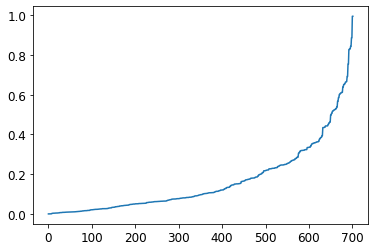

In [269]:
plt.plot(corr_sorted)
plt.show()

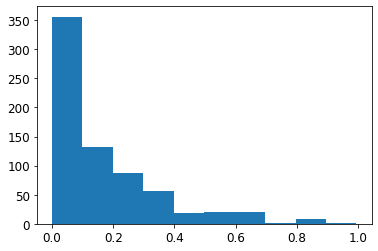

In [270]:
plt.hist(corr_sorted)
plt.show()

## Hipoteza na koniec etapu 2 

Będziemy za pomocą regresji badać wpływ atrybutów gwiazdy (masa, metaliczność, itd.) na ilość planet w układzie słonecznym.
W dalszej części ćwiczenia stworzymy model regresyjny, który pomoże odpowiedzieć ile dana gwiazda ma posiadać planet. 

# Etap 3

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [272]:
df.head()

Transit Depth (percentage)  Planet Equilibrium Temperature [K]  Stellar Luminosity [log(solar)]  Planet Radius (Earth radii)  Planet Mass [Earth Mass]  Number of Planets in System
0                    0.520044                          944.075769                         2.243000                     5.433556                 6165.6000                            1
1                    0.520044                          944.075769                         2.003000                     5.433556                 4684.8142                            1
2                    0.520044                          944.075769                         1.763000                     5.433556                 1525.5000                            1
3                    0.520044                          944.075769                         1.709333                     5.433556                 1481.0878                            1
4                    0.520044                          944.075769                         1.655667                     5.433556                  565.7374                            1

In [273]:
newX = df.drop('Number of Planets in System', axis=1)
newY = df['Number of Planets in System']

In [274]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))

1232 1232


In [275]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [276]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [277]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [278]:
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)

linear regression train score: 0.04170584152665624
linear regression test score: 0.026952649629739645
ridge regression train score low alpha: 0.041705841526533005
ridge regression test score low alpha: 0.026952668289207393


linear regression train score: 0.7419034960343789
linear regression test score: 0.7147895265576846
ridge regression train score low alpha: 0.7419030253527292
ridge regression test score low alpha: 0.7146125373123906


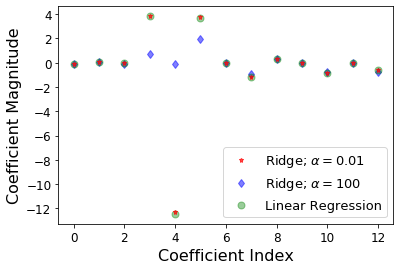

In [247]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
#print boston_df.info()
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target
#print boston_df.head(3)
newX=boston_df.drop('Price',axis=1)
newY=boston_df['Price']
#print type(newY)# pandas core frame
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()